In [2]:
init_c

array([ 0.00000000e+00,  7.81831482e-01,  9.74927912e-01,  4.33883739e-01,
       -4.33883739e-01, -9.74927912e-01, -7.81831482e-01, -2.44929360e-16])

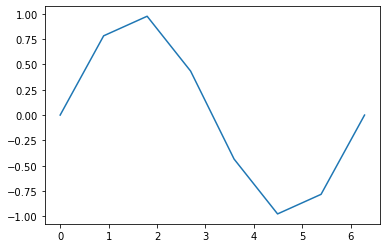

In [1]:
import analytical_file
import ic_file
import numpy as np
import matplotlib.pyplot as plt
import timestep_file
import FLAG_file
import grid_file
import input_file
import step
import error_file
Length=2*np.pi
#     nx_=input_file.Nx
nx_=input_file.Nx
dx=Length/(nx_-1)        
x_=grid_file.grid_(dx,nx_)
C=input_file.c
dt=timestep_file.timestep_(dx,cfl=input_file.cfl,EqFLAG=FLAG_file.EqnFLAG,cx=input_file.c)

init_c=ic_file.ic_(x_,amp=input_file.amp_ls,kappa=input_file.k_ls,phi=input_file.phi_ls,
                   num_k=input_file.numk,num_phi=input_file.numphi,Nx=nx_)
plt.plot(x_,init_c)

In [1]:
def Sync_sim(num_grid):
    import analytical_file
    import ic_file
    import numpy as np
    import matplotlib.pyplot as plt
    import timestep_file
    import FLAG_file
    import grid_file
    import input_file
    import step
    import error_file
    Length=2*np.pi
#     nx_=input_file.Nx
    nx_=num_grid
    dx=Length/nx_
    x_=grid_file.grid_(dx,nx_)
    C=input_file.c
    dt=timestep_file.timestep_(dx,cfl=input_file.cfl,EqFLAG=FLAG_file.EqnFLAG,cx=input_file.c)

    init_c=ic_file.ic_(x_,amp=input_file.amp_ls,kappa=input_file.k_ls,phi=input_file.phi_ls,
                       num_k=input_file.numk,num_phi=input_file.numphi,Nx=nx_)
    plt.plot(x_,init_c)
#     plt.show()

    ls=[]
    Nt=input_file.N_t_
    u=init_c
    ls.append(u)

    for j in range(Nt):
        rhs=step.cd2u1(u,C,dx,nx_,Eqflag=FLAG_file.EqnFLAG,Syncflag=FLAG_file.SyncFLAG)
        u=step.euler(u,rhs,dt,nx_)
        ls.append(u)

    for i in range(40):
        plt.plot(x_,ls[i*7])
        
    ana_soln=analytical_file.analytical_(x_,input_file.amp_ls,input_file.k_ls,input_file.phi_ls,input_file.numk,
                                input_file.numphi,nx_,dt*Nt,C,0)
    error_Nx=error_file.error_MSE_(ana_soln,ls[-1])
    return error_Nx

In [2]:
import matplotlib.pyplot as plt
import numpy as np

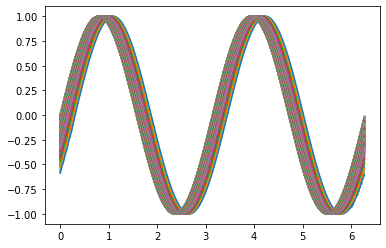

In [3]:
err=[]
n_list=64*np.arange(7,15)
for n in n_list:
    err.append(Sync_sim(n))

In [4]:
np.log(err)

array([-10.3367053 , -10.70152291, -11.02318585, -11.31313342,
       -11.57793985, -11.82193468, -12.04824864, -12.25928459])

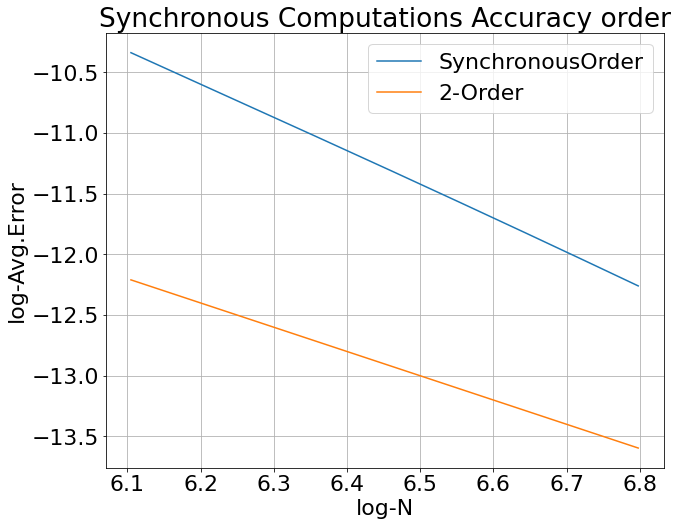

In [5]:
import numpy as np
def plot_error(n_list,err,comptype='Synchronous',order=2):
    # plt.plot(n_list,err)
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(10,8))
    plt.plot(np.log(n_list),np.log(err),label=f'{comptype}Order')
    plt.plot(np.log(n_list),-2*np.log(n_list),label=f'{order}-Order')
    plt.title(f"{comptype} Computations Accuracy order")
    plt.xlabel("log-N")
    plt.ylabel("log-Avg.Error")
    plt.legend()
    plt.grid()
plot_error(n_list,err,'Synchronous',2)

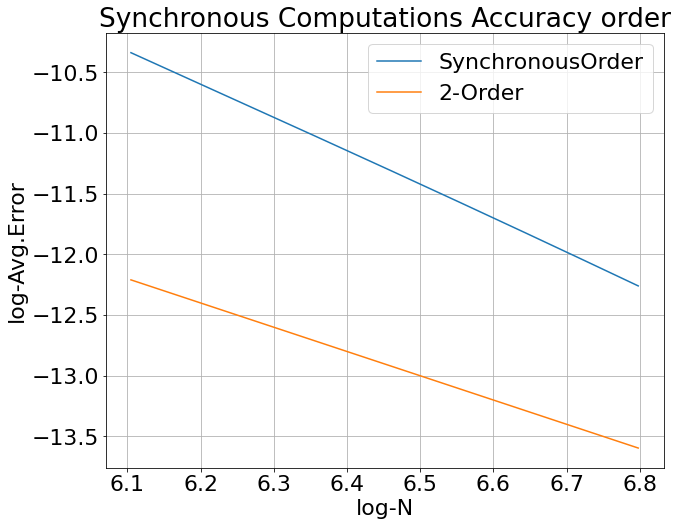

In [6]:
plot_error(n_list,err,'Synchronous',2)